# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

import requests
from api_keys import weather_api_key
import json

# import os
# import csv

from citipy import citipy

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

In [64]:
#create a list for latitude and longitude
lat_points =[]
long_points =[]

#find array of latitude coordinates
random_lat = np.random.uniform(low=-90.00, high=90.00, size=1500)
#find array of longitude coordinates
random_long = np.random.uniform(low=-180.00, high=180.00, size=1500)
#create coordinate combinations
coordinates = zip(random_lat,random_long)

In [65]:
#create a list for cities to live
unique_cities = []
random_cities = []
#Loop through coordinates to create a list of nearest cities
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #remove the space in between cities with more than 2 names
    #city = city.replace(" ", "20%")
    
    #remove potential repeating cities
    if city not in unique_cities:
        unique_cities.append(city)
    
print(unique_cities)

['cabedelo', 'lata', 'harlow', 'hobart', 'belaya gora', 'san cristobal', 'illoqqortoormiut', 'arraial do cabo', 'kalabagh', 'new norfolk', 'vestmannaeyjar', 'khatanga', 'mount gambier', 'barbar', 'roebourne', 'dwarka', 'yulara', 'punta arenas', 'taolanaro', 'ambilobe', 'gat', 'hithadhoo', 'kodiak', 'bluff', 'bria', 'clyde river', 'rikitea', 'hermanus', 'atuona', 'avarua', 'ponta do sol', 'asyut', 'iskele', 'dunedin', 'haines junction', 'albany', 'chumikan', 'opuwo', 'butaritari', 'pacific grove', 'price', 'delmiro gouveia', 'lebanon', 'tuktoyaktuk', 'zamora', 'lebu', 'mar del plata', 'east london', 'vaini', 'victoria', 'ilulissat', 'mombetsu', 'kaitangata', 'ushuaia', 'provideniya', 'busselton', 'guerrero negro', 'kapaa', 'beringovskiy', 'cape town', 'cayenne', 'ocean city', 'ostrovnoy', 'quatre cocos', 'yellowknife', 'kalabo', 'castro', 'puerto cabezas', 'yeppoon', 'mys shmidta', 'puerto padre', 'male', 'tawkar', 'chazuta', 'waingapu', 'owando', 'ozgon', 'vila velha', 'ucluelet', 'jap

## Generate Cities List

In [66]:
len(unique_cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
city_name = []
latitude = []
longitude =[]
temperature_f = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Log file print statement
print(f"Begin Data Retrieval")
print(f"----------------------------------")

for city in unique_cities:
    try:
        query_url = f'q={city}&appid={weather_api_key}&units=imperial'
        #api call for individual cities
        url = base_url + query_url
        weather_data = requests.get(url).json()
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature_f.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
    except KeyError: 'name'
        
    print(f"Processing Record {count} | {city}")
    count += 1
    
print(f"----------------------------------")    
print(f"Data Retrieval Complete")
print(f"----------------------------------")
# print(city_name)
# print(latitude)
# print(longitude)
# print(temperature_f)
# print(humidity)
# print(cloudiness)
# print(wind_speed)


Begin Data Retrieval
----------------------------------
Processing Record 1 | cabedelo
Processing Record 2 | lata
Processing Record 3 | harlow
Processing Record 4 | hobart
Processing Record 5 | belaya gora
Processing Record 6 | san cristobal
Processing Record 7 | illoqqortoormiut
Processing Record 8 | arraial do cabo
Processing Record 9 | kalabagh
Processing Record 10 | new norfolk
Processing Record 11 | vestmannaeyjar
Processing Record 12 | khatanga
Processing Record 13 | mount gambier
Processing Record 14 | barbar
Processing Record 15 | roebourne
Processing Record 16 | dwarka
Processing Record 17 | yulara
Processing Record 18 | punta arenas
Processing Record 19 | taolanaro
Processing Record 20 | ambilobe
Processing Record 21 | gat
Processing Record 22 | hithadhoo
Processing Record 23 | kodiak
Processing Record 24 | bluff
Processing Record 25 | bria
Processing Record 26 | clyde river
Processing Record 27 | rikitea
Processing Record 28 | hermanus
Processing Record 29 | atuona
Processin

Processing Record 248 | warqla
Processing Record 249 | port elizabeth
Processing Record 250 | tilichiki
Processing Record 251 | shubarshi
Processing Record 252 | flinders
Processing Record 253 | torrington
Processing Record 254 | kruisfontein
Processing Record 255 | kununurra
Processing Record 256 | karamea
Processing Record 257 | mamakan
Processing Record 258 | kalmunai
Processing Record 259 | hihifo
Processing Record 260 | charlestown
Processing Record 261 | aquiraz
Processing Record 262 | kashi
Processing Record 263 | kargasok
Processing Record 264 | meulaboh
Processing Record 265 | hirara
Processing Record 266 | alta floresta
Processing Record 267 | laredo
Processing Record 268 | aklavik
Processing Record 269 | ponta delgada
Processing Record 270 | viligili
Processing Record 271 | pindiga
Processing Record 272 | chara
Processing Record 273 | bonthe
Processing Record 274 | shingu
Processing Record 275 | sao joao da barra
Processing Record 276 | garowe
Processing Record 277 | attawap

Processing Record 496 | hit
Processing Record 497 | marystown
Processing Record 498 | taoudenni
Processing Record 499 | ikalamavony
Processing Record 500 | falkenstein
Processing Record 501 | kresttsy
Processing Record 502 | prince rupert
Processing Record 503 | aden
Processing Record 504 | saint anthony
Processing Record 505 | abeche
Processing Record 506 | sao felix do xingu
Processing Record 507 | sao filipe
Processing Record 508 | yining
Processing Record 509 | carutapera
Processing Record 510 | huangmei
Processing Record 511 | nemuro
Processing Record 512 | lavrentiya
Processing Record 513 | iwanai
Processing Record 514 | lac du bonnet
Processing Record 515 | necochea
Processing Record 516 | port-gentil
Processing Record 517 | tuatapere
Processing Record 518 | tabory
Processing Record 519 | neiafu
Processing Record 520 | hovd
Processing Record 521 | quang ngai
Processing Record 522 | knysna
Processing Record 523 | tumannyy
Processing Record 524 | college
Processing Record 525 | or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
#create a df with all unique cities
data_set = {'cities': city_name,
'lat' : latitude,
'long' : longitude,
'max_fahrenheit' : temperature_f,
'humidity' : humidity,
'cloudiness' : cloudiness,
'wind_speed' : wind_speed,
'country' : country,
'date' : date}
weather_data_df = pd.DataFrame(data_set)
weather_data_df

#export file to csv
weather_data_df.to_csv('weather_data_df')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [93]:
#check to see if there are any with over 100% humidity
humidity_under_hundred = weather_data_df.loc[weather_data_df['humidity'] > 100]
humidity_under_hundred.count()
#there is none

cities            0
lat               0
long              0
max_fahrenheit    0
humidity          0
cloudiness        0
wind_speed        0
country           0
date              0
dtype: int64

In [94]:
#  Get the indices of cities that have humidity over 100%.


In [95]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature in Fahrenheit')

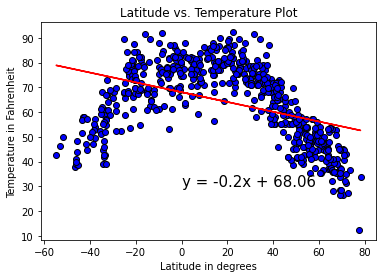

In [96]:
#set the x_axis values to latitude
x_values = weather_data_df["lat"]
y_values = weather_data_df["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


## Latitude vs. Humidity Plot

Text(0, 0.5, 'Percentage of Humidity')

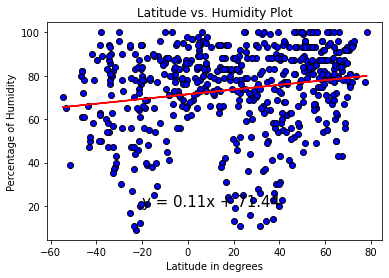

In [97]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Percentage of Cloudiness')

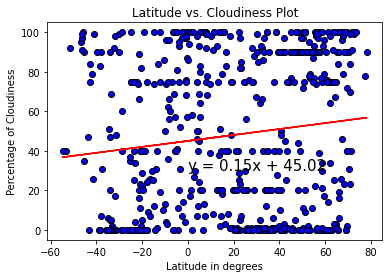

In [98]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

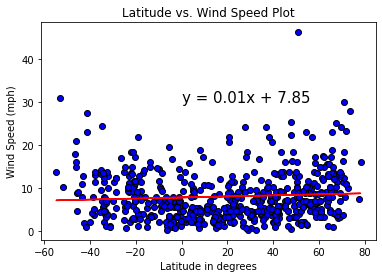

In [99]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [100]:
north_hemisphere = weather_data_df.loc[weather_data_df['lat'] >= 0]
south_hemisphere = weather_data_df.loc[weather_data_df['lat'] < 0]
south_hemisphere

cities    lat    long  max_fahrenheit  humidity  cloudiness  \
0           Cabedelo  -6.98  -34.83           75.20       100          75   
3             Hobart -42.88  147.33           57.99        50          75   
6    Arraial do Cabo -22.97  -42.03           75.20        83           4   
8        New Norfolk -42.78  147.06           57.99        52          84   
11     Mount Gambier -37.83  140.77           57.20        50           7   
..               ...    ...     ...             ...       ...         ...   
540    Pangkalanbuun  -2.68  111.62           82.22        79         100   
557          Lusambo  -4.97   23.45           69.64        95         100   
558           Hwange -18.37   26.50           69.49        40           0   
566    Alice Springs -23.70  133.88           84.20        11          75   
569      Grand Gaube -20.01   57.66           73.00        78           5   

     wind_speed country        date  
0          8.05      BR  1601259379  
3         12.75      AU  1601259369  
6          9.17      BR  1601259166  
8          1.99      AU  1601259383  
11        11.41      AU  1601259385  
..          ...     ...         ...  
540        0.81      ID  1601259675  
557        1.59      CD  1601259684  
558        2.86      ZW  1601259685  
566        5.82      AU  1601259690  
569        5.01      MU  1601259691  

[181 rows x 9 columns]

Text(0, 0.5, 'Temperature in Fahrenheit')

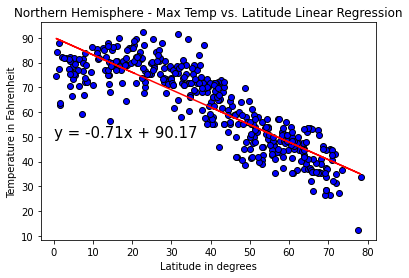

In [101]:
#set the x_axis values to latitude
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature in Fahrenheit')

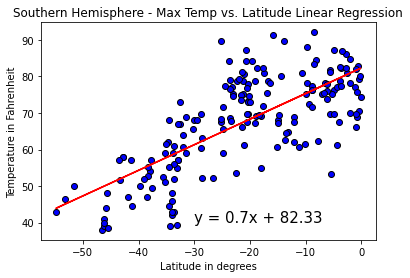

In [102]:
#set the x_axis values to latitude
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["max_fahrenheit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Temperature in Fahrenheit")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

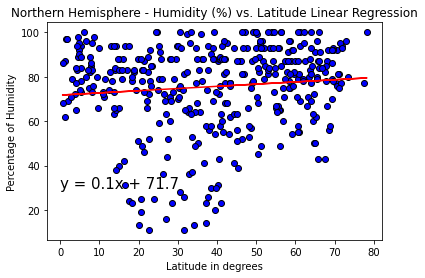

In [103]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Humidity')

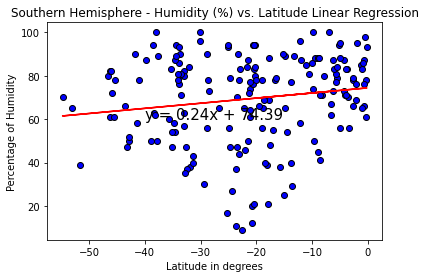

In [104]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

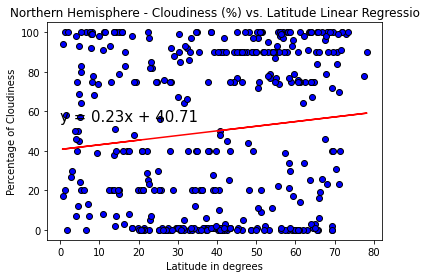

In [105]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = north_hemisphere["lat"]
y_values = north_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,55),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Percentage of Cloudiness')

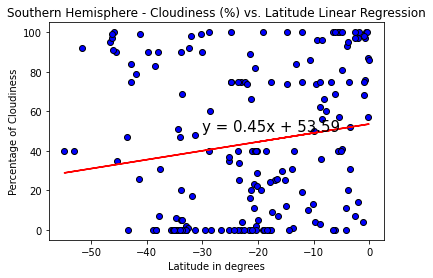

In [106]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Percentage of Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

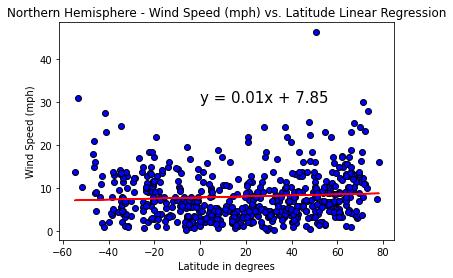

In [107]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = weather_data_df["lat"]
y_values = weather_data_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
#label graph
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

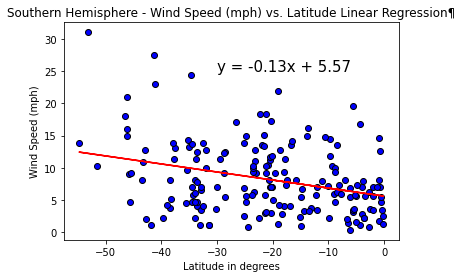

In [108]:
#set the x_axis values to latitude and y_axis to comparing units
x_values = south_hemisphere["lat"]
y_values = south_hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot scatter graph 
plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="black")
#label graph
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶")
plt.xlabel("Latitude in degrees")
plt.ylabel("Wind Speed (mph)")